In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import csv


# Load the dataset from CSV
df = pd.read_csv('ml_data_variable.csv').iloc[:, 1:]


# Extract numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_columns)

# Apply PCA
pca = PCA()
pca.fit(normalized_data)

# Centralize the data
centralized_data = normalized_data - pca.mean_

# Get the column names
column_names = numeric_columns.columns.tolist()

# Create a new DataFrame with centralized data and column names
centralized_df = pd.DataFrame(centralized_data, columns=column_names)

centralized_df.to_csv('ml_data_variable_normalized.csv', index=False)



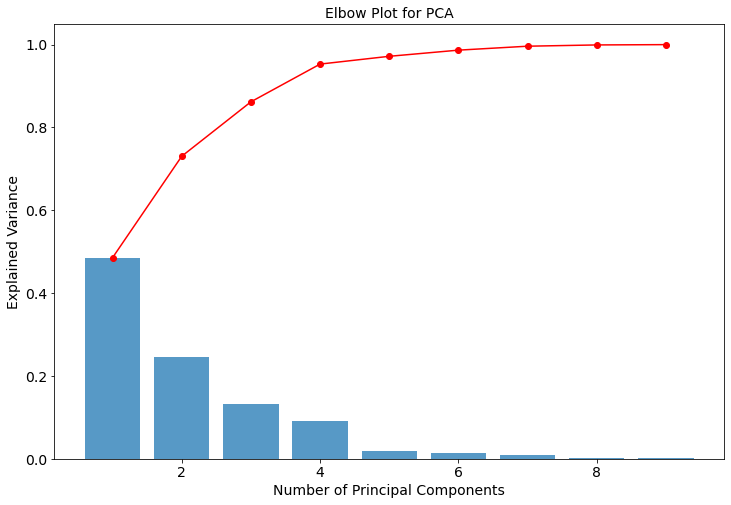

Variance covered by the first component: 48.56%
Variance covered by the second component: 24.49%
Explained Variance:
Component 1: 48.56%
Component 2: 24.49%
Component 3: 13.14%
Component 4: 9.11%
Component 5: 1.88%
Component 6: 1.49%
Component 7: 0.95%
Component 8: 0.31%
Component 9: 0.07%

Cumulative Explained Variance:
Components 1-1: 48.56%
Components 1-2: 73.05%
Components 1-3: 86.19%
Components 1-4: 95.30%
Components 1-5: 97.18%
Components 1-6: 98.67%
Components 1-7: 99.62%
Components 1-8: 99.93%
Components 1-9: 100.00%


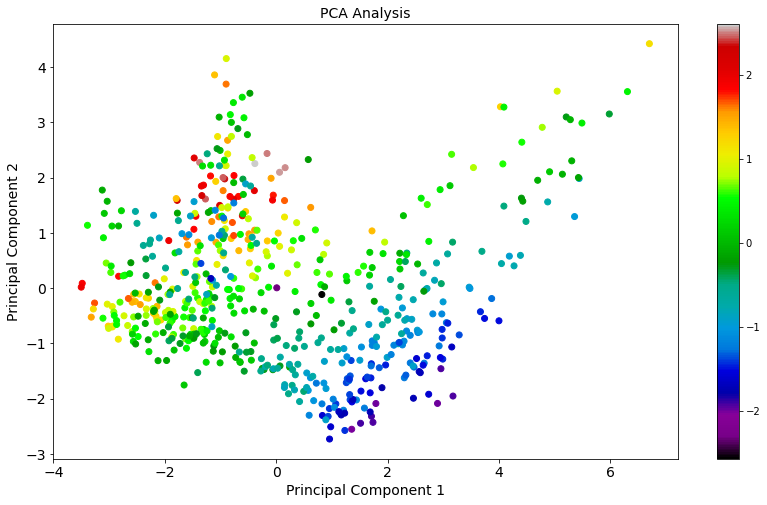

In [2]:
data_centralized = pd.read_csv('ml_data_variable_normalized.csv')



# Perform PCA
pca = PCA()
pca.fit(data_centralized)

# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the elbow plot using a bar chart
plt.figure(figsize=(12, 8))
plt.bar(range(1, len(cumulative_variance) + 1), explained_variance, alpha=0.75, align='center')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Elbow Plot for PCA', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('elbow_plot.jpg', dpi = 300)
plt.show()





# Get explained variance for the first and second components
explained_variance = pca.explained_variance_ratio_
variance_first_component = explained_variance[0]
variance_second_component = explained_variance[1]

# Print the results
print(f"Variance covered by the first component: {variance_first_component:.2%}")
print(f"Variance covered by the second component: {variance_second_component:.2%}")

# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print the results
print("Explained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"Component {i+1}: {variance:.2%}")

print("\nCumulative Explained Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"Components 1-{i+1}: {variance:.2%}")




# Separate the features (X) and the target variable (y)
X = data_centralized.drop('CO2, Million Metric Tons', axis=1)
y = data_centralized['CO2, Million Metric Tons']

# Initialize a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

plt.figure(figsize=(14, 8))  # Adjust the figure size if needed


#custom_cmap = 'viridis'
#custom_cmap = 'CMRmap'  # Change the color for any invalid or missing values
custom_cmap = 'nipy_spectral'

# Create a scatter plot of the projected data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=custom_cmap)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA Analysis', fontsize=14)
plt.colorbar()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('PCA Analysis (Components 1 and 2).jpg', dpi = 300)
plt.show()



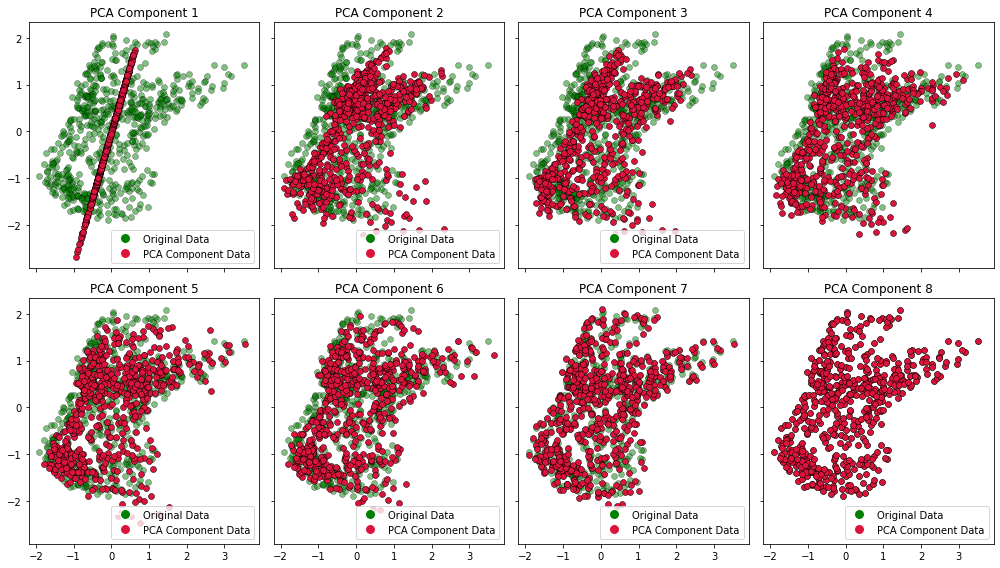

In [40]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

# Load the dataset from CSV
df = pd.read_csv('ml_data_variable_normalized.csv').iloc[:, 1:]

# Extract numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_columns)

# Initialize the PCA model
pca = PCA()

# Apply PCA and transform the data to principal components
X_pca = pca.fit_transform(normalized_data)

# Define the number of rows and columns for the subplots
rows = 2
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 8), sharex=True, sharey=True)

# Initialize the components counter
comps = 1

# Iterate through each subplot
for row in range(rows):
    for col in range(cols):
        try:
            ax = sns.scatterplot(x=normalized_data[:, 0], y=normalized_data[:, 1], ax=axes[row, col], color='g', alpha=.5, edgecolor='black', label='Original Data')
            reconstructed_data = np.dot(X_pca[:, :comps], pca.components_[:comps, :])
            ax = sns.scatterplot(x=reconstructed_data[:, 0], y=reconstructed_data[:, 1], ax=axes[row, col], color='crimson', edgecolor='black', label=f'PCA Component {comps}')
            ax.set_title(f'PCA Component {comps}')
            comps += 1
            
            # Remove the default legend
            ax.legend().set_visible(False)
            
        except:
            pass

plt.tight_layout()

# Create custom legend
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Original Data'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='crimson', markersize=10, label='PCA Component Data')]

# Place the legend in the lower right corner of the last subplot
axes[0, 0].legend(handles=legend_elements, loc='lower right')
axes[0, 1].legend(handles=legend_elements, loc='lower right')
axes[0, 2].legend(handles=legend_elements, loc='lower right')

axes[1, 0].legend(handles=legend_elements, loc='lower right')
axes[1, 1].legend(handles=legend_elements, loc='lower right')
axes[1, 2].legend(handles=legend_elements, loc='lower right')

axes[-1, -1].legend(handles=legend_elements, loc='lower right')
axes[-1, -2].legend(handles=legend_elements, loc='lower right')
axes[-1, -3].legend(handles=legend_elements, loc='lower right')

plt.savefig('pca_components_vs_original_data2.png', dpi=300)
plt.show()


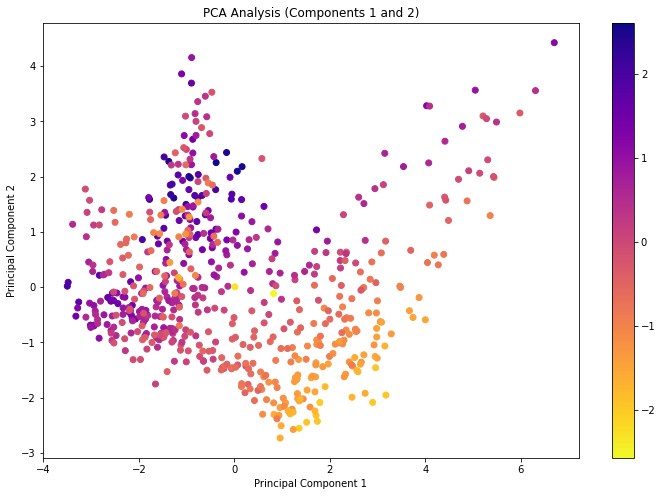

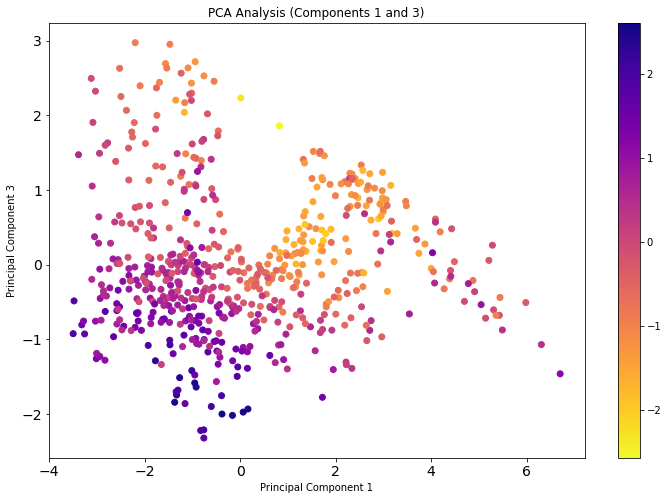

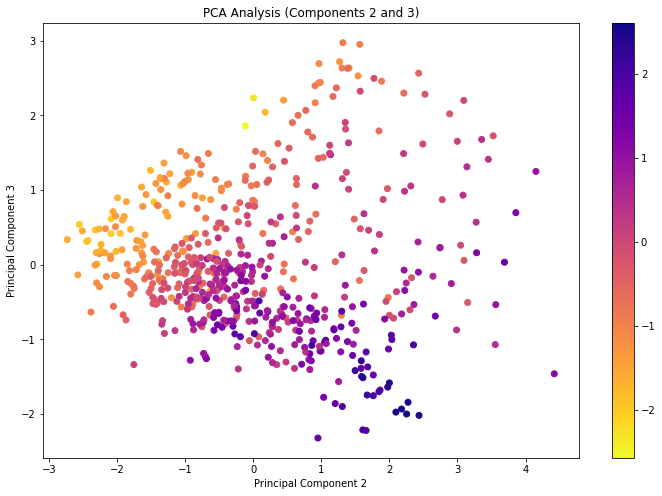

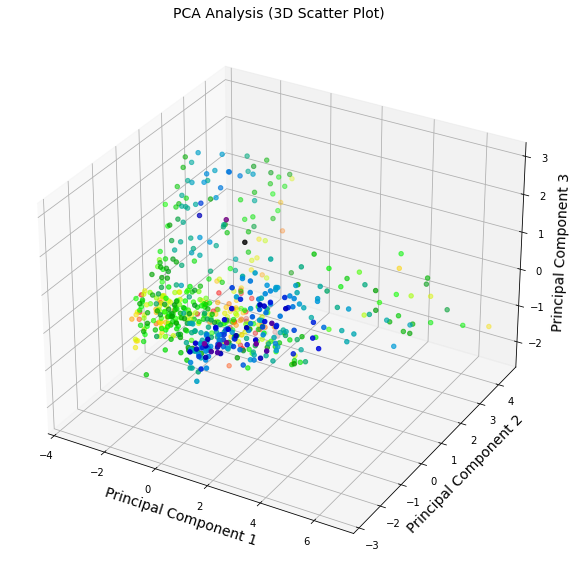

In [4]:


# Separate the features (X) and the target variable (y)
X = data_centralized.drop('CO2, Million Metric Tons', axis=1)
y = data_centralized['CO2, Million Metric Tons']

# Initialize a PCA object with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

# Create a scatter plot of the projected data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma_r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis (Components 1 and 2)')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

# Create a scatter plot of the projected data
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=y, cmap='plasma_r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA Analysis (Components 1 and 3)')
plt.colorbar()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

fig = plt.figure(figsize=(12, 8))
# Create a scatter plot of the projected data
plt.scatter(X_pca[:, 1], X_pca[:, 2], c=y, cmap='plasma_r')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA Analysis (Components 2 and 3)')
plt.colorbar()
plt.show()


# Initialize a PCA object with the desired number of components
pca = PCA(n_components=3)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(14, 10))  # Adjust the figure size if needed
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot of the projected data
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='nipy_spectral')
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
ax.set_title('PCA Analysis (3D Scatter Plot)', fontsize=14)
plt.savefig('PCA Analysis 3d.jpg', dpi = 300)
plt.show()


In [5]:


# Initialize a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(X)

# Access the principal components
principal_components = pca.components_

# Print the principal components
for i, component in enumerate(principal_components):
    print(f"Principal Component {i+1}: {component}")
    
    
print(pca.explained_variance_ratio_)


Principal Component 1: [-0.2703166  -0.09623761 -0.45870821 -0.24495152  0.39320125  0.35022499
 -0.45347159  0.40540293]
Principal Component 2: [-0.08828361  0.67277392  0.20670231  0.31073863  0.41249033  0.43446832
  0.20157364 -0.02745882]
[0.50896661 0.22799288]


In [6]:
# Access the feature loadings
feature_loadings = pca.components_

# Iterate over the components and their corresponding feature loadings
for component_idx, feature_loading in enumerate(feature_loadings):
    # Sort the feature loadings by magnitude
    sorted_loadings = sorted(zip(feature_loading, X.columns), reverse=True)
    
    # Print the top features for the current component
    print(f"Component {component_idx+1}:")
    for loading, feature_name in sorted_loadings:
        print(f"{feature_name}: {loading:.4f}")
    print()


Component 1:
PETRO_ELECTRICPOWER, Thousand Barrels per Day: 0.4054
PETRO_COMMERCIAL, Thousand Barrels per Day: 0.3932
PETRO_RESIDENTIAL, Thousand Barrels per Day: 0.3502
NATURALGAS, Billion Cubic Feet: -0.0962
PETRO_INDUSTRIAL, Thousand Barrels per Day: -0.2450
COAL, Thousand Short Tons: -0.2703
PETRO_TRANSPORTATION, Thousand Barrels per Day: -0.4535
ELECTRICITY, Million Kilowatthours: -0.4587

Component 2:
NATURALGAS, Billion Cubic Feet: 0.6728
PETRO_RESIDENTIAL, Thousand Barrels per Day: 0.4345
PETRO_COMMERCIAL, Thousand Barrels per Day: 0.4125
PETRO_INDUSTRIAL, Thousand Barrels per Day: 0.3107
ELECTRICITY, Million Kilowatthours: 0.2067
PETRO_TRANSPORTATION, Thousand Barrels per Day: 0.2016
PETRO_ELECTRICPOWER, Thousand Barrels per Day: -0.0275
COAL, Thousand Short Tons: -0.0883

